**Predict the energy based on input variables with least possible error.**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_excel("energy.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#**Data Understanding:**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [117]:
df.size

47840

In [118]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [119]:
df.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64
PE,float64


In [120]:
df.shape

(9568, 5)

In [121]:
df.isnull().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [122]:
df.duplicated().sum()

np.int64(41)

#**Exploratory Data Analysis**

In [123]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**Boxplots for Outliers**

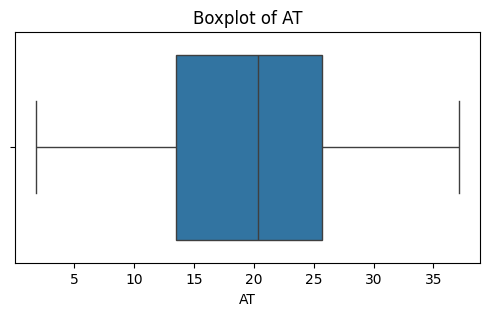

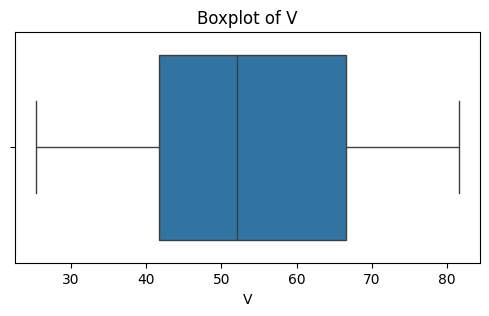

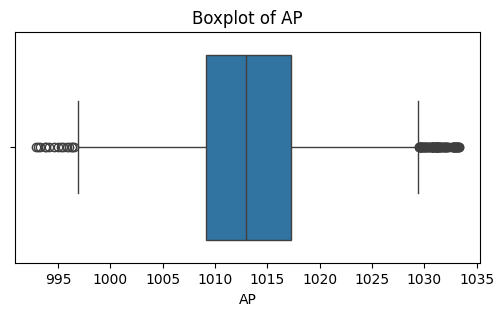

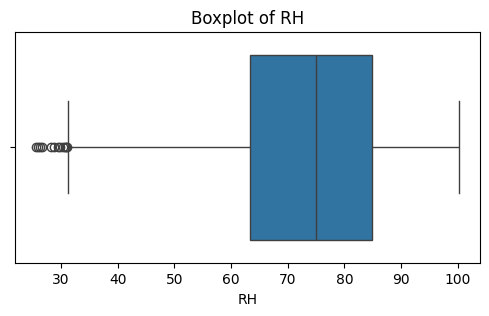

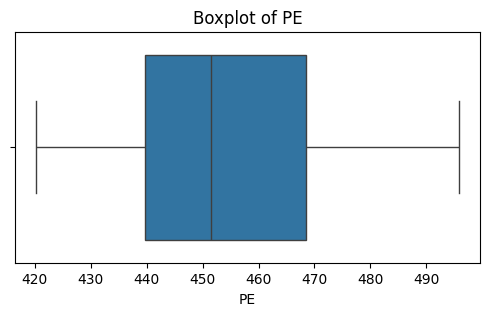

In [124]:
for col in ['AT','V','AP','RH','PE']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Univariate Analysis (Distribution of Each Feature)**

**- Understand data spread and skewness**

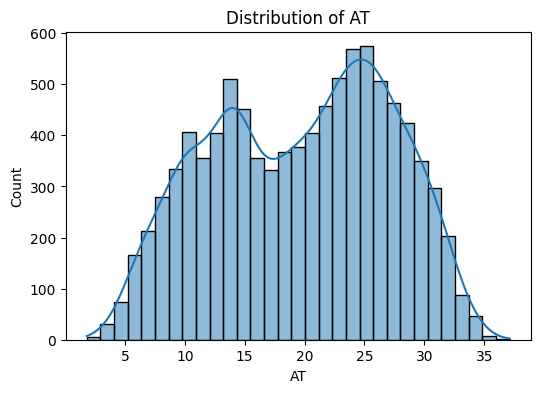

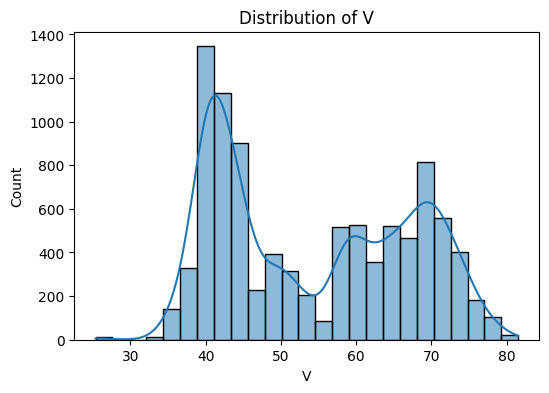

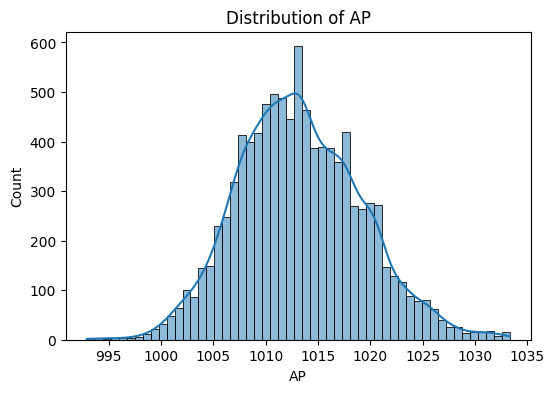

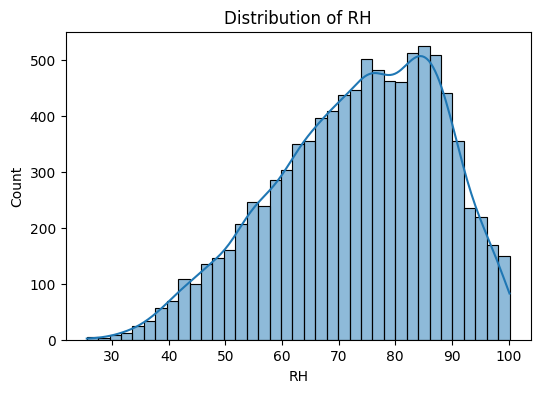

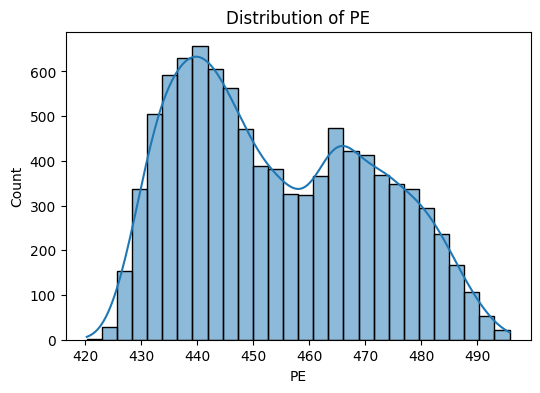

In [125]:
for col in ['AT','V','AP','RH','PE']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Correlation Matrix**

**- To identify features strongly correlated with PE and check multicollinearity.**

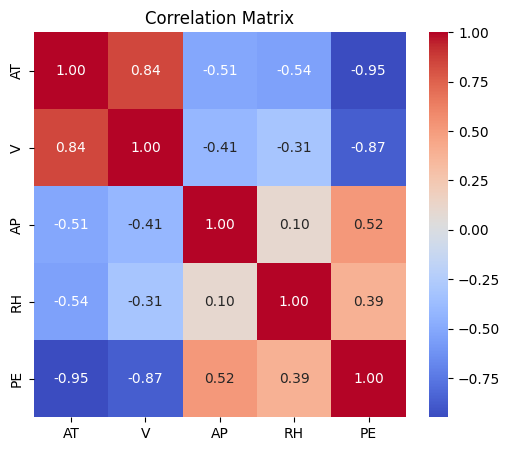

In [126]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Pairplot (Feature Relationships)**

**- To visualize scatter relationships — linear vs nonlinear.**

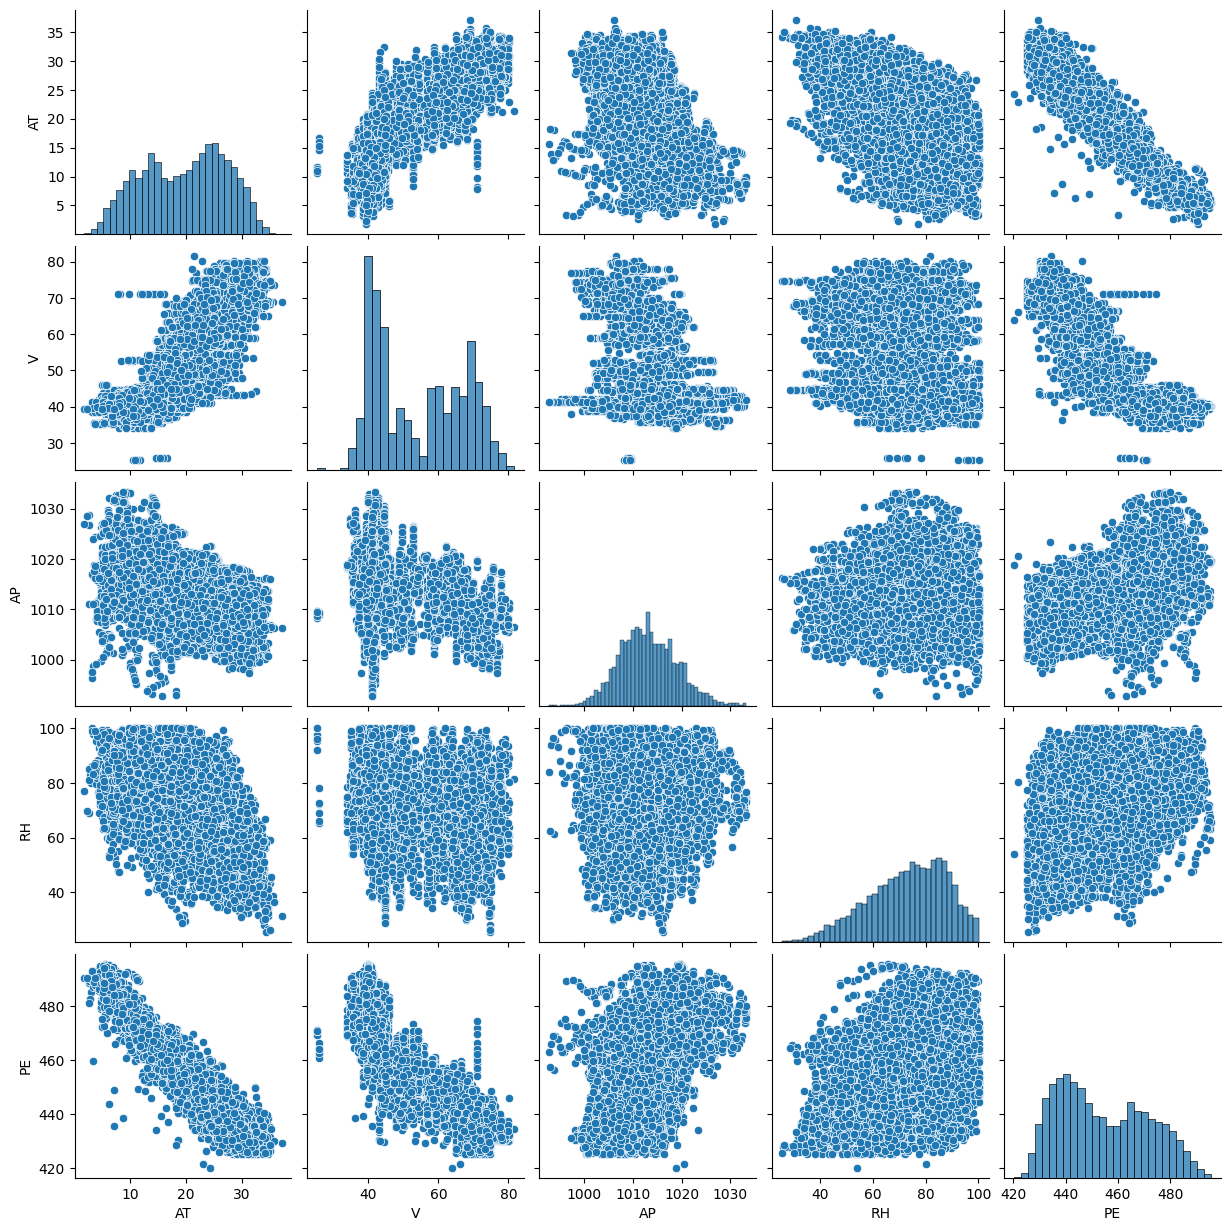

In [127]:
sns.pairplot(df, vars=['AT','V','AP','RH','PE'])
plt.show()


**Visualize scatter relationships — linear vs nonlinear.**

**- To see how each feature affects energy output; helps in feature selection**

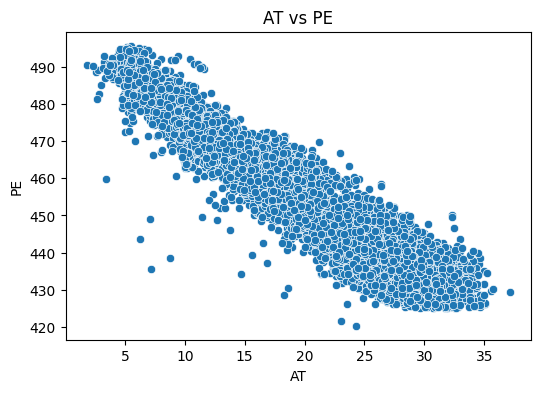

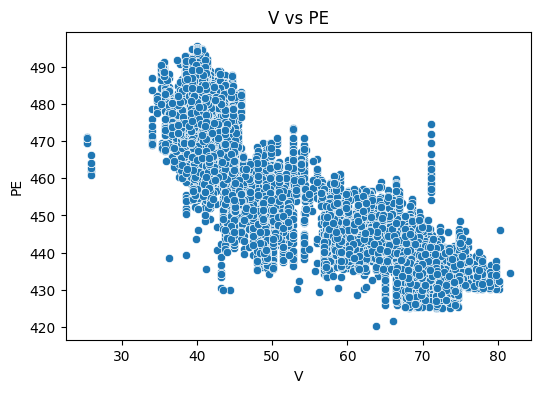

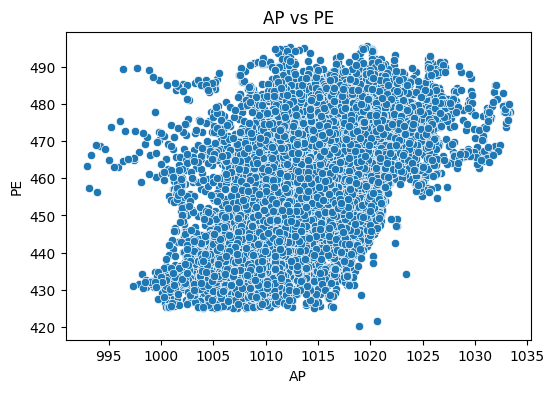

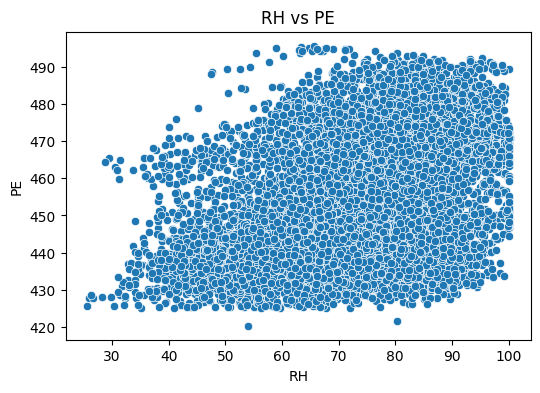

In [128]:
for col in ['AT','V','AP','RH']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['PE'])
    plt.title(f'{col} vs PE')
    plt.show()


**Statistical Correlation with Target**

**- To identify which features are most important for predicting PE.**

In [129]:
corr_target = df.corr()['PE'].sort_values(ascending=False)
print(corr_target)


PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64


# **Data Preprocessing**

In [130]:
X = df.drop(columns='PE')
y = df['PE']

**Train Test Split**

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

**Feature Scaling**

In [132]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Building the ANN**

In [133]:
import tensorflow as tf
import keras

In [134]:
from keras.models import Sequential
from keras.layers import Dense

In [135]:
# Initializing ANN
ann_model = Sequential()

In [136]:
# adding input layer & 1st Hidden layer
ann_model.add(Dense(input_dim = 4, units=6, activation = 'relu', kernel_initializer = 'uniform'))

In [137]:
# adding 2st Hidden layer
ann_model.add(Dense(units=6, activation = 'relu', kernel_initializer = 'uniform'))

In [138]:
# adding Output layer
ann_model.add(Dense(units=1, activation = 'relu', kernel_initializer = 'uniform'))

In [139]:
# compiling the ANN
ann_model.compile(optimizer = 'adam',
                  loss = 'mean_squared_error')

# **Train the model**

In [140]:
ann_model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206243.3281
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199304.2188
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166553.6719
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112889.3906
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71639.2109
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50489.3359
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32795.3516
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19158.2520
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9590.5928
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5090.4048
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3497.1062
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2658.0898
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2172.3110
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

# **Prediction**

In [141]:
ypred_train = ann_model.predict(X_train)
ypred_test = ann_model.predict(X_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# **Evaluation**

In [142]:
from sklearn.metrics import mean_squared_error
print("Train MSE: ", mean_squared_error(y_train, ypred_train))
print("Test MSE: ", mean_squared_error(y_test, ypred_test))

Train MSE:  21.883004617245994
Test MSE:  20.618270066234313


In [143]:
from sklearn.metrics import r2_score

print("R2_train: ", r2_score(y_train, ypred_train))
print("R2_test: ", r2_score(y_test, ypred_test))

R2_train:  0.9247809409296444
R2_test:  0.9295072561536734
